# EDA - Purchases

## Importamos desde Google Cloud

In [5]:
from google.cloud import storage

# Configuración
PROJECT_ID = "inventarioproject-471611"
BUCKET_NAME = "proyecto_inventario_bucket"

# Conectar a Google Cloud Storage
client_storage = storage.Client(project=PROJECT_ID)

try:
    bucket = client_storage.bucket(BUCKET_NAME)
    print(f"✅ Conexión exitosa al bucket: {BUCKET_NAME}")

    # Listar archivos
    blobs = list(bucket.list_blobs())
    if not blobs:
        print("⚠️ El bucket está vacío.")
    else:
        print("📂 Archivos encontrados en el bucket:")
        for blob in blobs:
            print("-", blob.name)
except Exception as e:
    print("❌ Error al conectar o listar archivos:")
    print(e)


✅ Conexión exitosa al bucket: proyecto_inventario_bucket
📂 Archivos encontrados en el bucket:
- PurchasesFINAL12312016.csv
- SalesFINAL12312016.csv


In [6]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = r"C:\Users\Usuario\AppData\Roaming\gcloud\application_default_credentials.json"

In [7]:
import sys
print(sys.executable)



c:\Users\Usuario\OneDrive\Escritorio\InventarioProject\PF-Inventory\venv_inventario\Scripts\python.exe


In [ ]:
# ==========================================
# ETL seguro: Verificar bucket, descargar y limpiar CSV
# ==========================================

import os
from google.cloud import storage
import pandas as pd

# ---- Configuración ----
PROJECT_ID = "inventarioproject-471611"           # Tu proyecto de GCP
BUCKET_NAME = "proyecto_inventario_bucket"       # Tu bucket
CSV_FILE_NAME = "PurchasesFINAL12312016.csv"     # Archivo que querés procesar
LOCAL_FILE = "PurchasesFINAL12312016.csv"        # Nombre temporal local

# ---- Configurar credenciales ----
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = r"C:\Users\Usuario\AppData\Roaming\gcloud\application_default_credentials.json"

# ---- Conectar con GCS ----
try:
    client_storage = storage.Client(project=PROJECT_ID)
    bucket = client_storage.get_bucket(BUCKET_NAME)
    print(f"✅ Conexión exitosa al bucket: {BUCKET_NAME}")
except Exception as e:
    print("❌ No se pudo conectar al bucket. Error:")
    print(e)

# ---- Listar archivos del bucket ----
try:
    blobs = list(bucket.list_blobs())
    if len(blobs) == 0:
        print("⚠️ El bucket está vacío")
    else:
        print("Archivos encontrados en el bucket:")
        for b in blobs:
            print("-", b.name)
except Exception as e:
    print("❌ No se pudieron listar los archivos. Error:")
    print(e)

# ---- Descargar CSV solo si existe ----
if CSV_FILE_NAME in [b.name for b in blobs]:
    print(f"📥 Descargando archivo: {CSV_FILE_NAME}...")
    blob = bucket.blob(CSV_FILE_NAME)
    blob.download_to_filename(LOCAL_FILE)
    print("✅ Descarga completada")
else:
    print(f"❌ No se encontró el archivo {CSV_FILE_NAME} en el bucket")

# ---- Leer y limpiar CSV ----
try:
    df = pd.read_csv(LOCAL_FILE)
    print(f"✅ CSV cargado. Filas: {df.shape[0]}, Columnas: {df.shape[1]}")
    
    # Limpieza básica
    #df.columns = df.columns.str.lower().str.strip()  # Normalizar nombres
    #df.drop_duplicates(inplace=True)
    
    # Convertir fechas si existe columna 'fecha'
    #if 'fecha' in df.columns:
    #df['fecha'] = pd.to_datetime(df['fecha'], errors='coerce')
    
    # Rellenar nulos en columnas numéricas
    #for col in df.select_dtypes(include=['number']):
       # df[col].fillna(0, inplace=True)
    
   # print("✅ Limpieza básica completada")
except Exception as e:
    print("❌ Error al leer CSV:")
    print(e)

# ---- Mostrar primeras filas ----
print("Primeras 5 filas del DataFrame:")
print(df.head())

✅ Conexión exitosa al bucket: proyecto_inventario_bucket
Archivos encontrados en el bucket:
- PurchasesFINAL12312016.csv
- SalesFINAL12312016.csv
📥 Descargando archivo: PurchasesFINAL12312016.csv...
✅ Descarga completada
✅ CSV cargado. Filas: 2372474, Columnas: 16
❌ Error al leer CSV:
'fecha'
Primeras 5 filas del DataFrame:
           InventoryId  Store  Brand                   Description   Size  \
0    69_MOUNTMEND_8412     69   8412     Tequila Ocho Plata Fresno  750mL   
1     30_CULCHETH_5255     30   5255  TGI Fridays Ultimte Mudslide  1.75L   
2    34_PITMERDEN_5215     34   5215  TGI Fridays Long Island Iced  1.75L   
3  1_HARDERSFIELD_5255      1   5255  TGI Fridays Ultimte Mudslide  1.75L   
4    76_DONCASTER_2034     76   2034     Glendalough Double Barrel  750mL   

   VendorNumber                   VendorName  PONumber      PODate  \
0           105  ALTAMAR BRANDS LLC               8124  2015-12-21   
1          4466  AMERICAN VINTAGE BEVERAGE        8137  2015-12-22   
2

## EDA paso 1: Dimensiones y estructura general

In [ ]:
print("Dimensiones del dataset:")
print(f"Filas: {df.shape[0]}")
print(f"Columnas: {df.shape[1]}")
print("-" * 40)

print("Información general de las columnas:")
df.info()

Dimensiones del dataset:
Filas: 2372474
Columnas: 16
----------------------------------------
Información general de las columnas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372474 entries, 0 to 2372473
Data columns (total 16 columns):
 #   Column          Dtype  
---  ------          -----  
 0   InventoryId     object 
 1   Store           int64  
 2   Brand           int64  
 3   Description     object 
 4   Size            object 
 5   VendorNumber    int64  
 6   VendorName      object 
 7   PONumber        int64  
 8   PODate          object 
 9   ReceivingDate   object 
 10  InvoiceDate     object 
 11  PayDate         object 
 12  PurchasePrice   float64
 13  Quantity        int64  
 14  Dollars         float64
 15  Classification  int64  
dtypes: float64(2), int64(6), object(8)
memory usage: 289.6+ MB


## EDA Paso 2: Vista preliminar de los datos

* Mostrar primeras filas .head( )

* Mostrar últimas filas .tail( )

* Revisar nombres de columnas df.columns

In [10]:
df.head(5)

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40,1
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5,47.05,1
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6,56.10,1
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5,106.60,1


In [11]:
df.tail()

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
2372469,49_GARIGILL_22298,49,22298,Zorvino Vyds Sangiovese,750mL,90058,ZORVINO VINEYARDS,13593,2016-12-19,2016-12-28,2017-01-09,2017-02-06,8.06,12,96.72,2
2372470,1_HARDERSFIELD_19556,1,19556,Zorvino Bacca Z Blackberry,750mL,90058,ZORVINO VINEYARDS,13593,2016-12-19,2016-12-27,2017-01-09,2017-02-06,9.39,12,112.68,2
2372471,66_EANVERNESS_22297,66,22297,Zorvino Vyds Pearz,750mL,90058,ZORVINO VINEYARDS,13593,2016-12-19,2016-12-26,2017-01-09,2017-02-06,6.75,12,81.00,2
2372472,69_MOUNTMEND_19557,69,19557,Zorvino Fragole Z Strawberry,750mL,90058,ZORVINO VINEYARDS,13593,2016-12-19,2016-12-26,2017-01-09,2017-02-06,9.39,12,112.68,2
2372473,55_DRY GULCH_22298,55,22298,Zorvino Vyds Sangiovese,750mL,90058,ZORVINO VINEYARDS,13593,2016-12-19,2016-12-28,2017-01-09,2017-02-06,8.06,12,96.72,2


In [12]:
df.columns

Index(['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'VendorNumber',
       'VendorName', 'PONumber', 'PODate', 'ReceivingDate', 'InvoiceDate',
       'PayDate', 'PurchasePrice', 'Quantity', 'Dollars', 'Classification'],
      dtype='object')

## EDA Paso 3: Valores faltantes y duplicados

* Contar valores nulos df.isnull().sum()

* Revisar filas duplicadas df.duplicated().sum()

In [ ]:
df.isnull().sum()

InventoryId       0
Store             0
Brand             0
Description       0
Size              3
VendorNumber      0
VendorName        0
PONumber          0
PODate            0
ReceivingDate     0
InvoiceDate       0
PayDate           0
PurchasePrice     0
Quantity          0
Dollars           0
Classification    0
dtype: int64

In [ ]:
df.duplicated().sum()

np.int64(0)

## EDA Paso 4: Estadísticas descriptivas

* Resumen numérico (df.describe()  media, std, min, max, percentiles).

* Revisar distribuciones de columnas clave.

In [ ]:
df.describe()

,Store,Brand,VendorNumber,PONumber,PurchasePrice,Quantity,Dollars,Classification
count,2.372474e+06,2.372474e+06,2.372474e+06,2.372474e+06,2.372474e+06,2.372474e+06,2.372474e+06,2.372474e+06
mean,4.465133e+01,1.241864e+04,6.886436e+03,1.104094e+04,1.205005e+01,1.415585e+01,1.356815e+02,1.443520e+00
std,2.351245e+01,1.255728e+04,8.066694e+03,1.565340e+03,1.794510e+01,2.344616e+01,2.816649e+02,4.967999e-01
min,1.000000e+00,5.800000e+01,2.000000e+00,8.106000e+03,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,2.500000e+01,3.639000e+03,3.252000e+03,9.761000e+03,6.120000e+00,6.000000e+00,4.926000e+01,1.000000e+00
50%,4.800000e+01,6.523000e+03,4.425000e+03,1.110300e+04,9.220000e+00,1.000000e+01,8.393000e+01,1.000000e+00
75%,6.700000e+01,1.887700e+04,9.552000e+03,1.239700e+04,1.449000e+01,1.200000e+01,1.405200e+02,2.000000e+00
max,8.100000e+01,9.063100e+04,2.013590e+05,1.366100e+04,5.681810e+03,3.816000e+03,5.017570e+04,2.000000e+00


In [ ]:
# Columnas clave
df[['PurchasePrice', 'Quantity', 'Dollars']].describe()


,PurchasePrice,Quantity,Dollars
count,2.372474e+06,2.372474e+06,2.372474e+06
mean,1.205005e+01,1.415585e+01,1.356815e+02
std,1.794510e+01,2.344616e+01,2.816649e+02
min,0.000000e+00,1.000000e+00,0.000000e+00
25%,6.120000e+00,6.000000e+00,4.926000e+01
50%,9.220000e+00,1.000000e+01,8.393000e+01
75%,1.449000e+01,1.200000e+01,1.405200e+02
max,5.681810e+03,3.816000e+03,5.017570e+04


## EDA Paso 5: Tipos de datos y conversiones necesarias

* Confirmar que las fechas estén en datetime.

* Confirmar que los números no estén en texto.

In [32]:
fecha_cols = ['PODate', 'ReceivingDate', 'InvoiceDate', 'PayDate']
for col in fecha_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372474 entries, 0 to 2372473
Data columns (total 16 columns):
 #   Column          Dtype         
---  ------          -----         
 0   inventoryid     object        
 1   store           int64         
 2   brand           int64         
 3   description     object        
 4   size            object        
 5   vendornumber    int64         
 6   vendorname      object        
 7   ponumber        int64         
 8   podate          datetime64[ns]
 9   receivingdate   datetime64[ns]
 10  invoicedate     datetime64[ns]
 11  paydate         datetime64[ns]
 12  purchaseprice   float64       
 13  quantity        int64         
 14  dollars         float64       
 15  classification  int64         
dtypes: datetime64[ns](4), float64(2), int64(6), object(4)
memory usage: 289.6+ MB


## EDA Paso 6: Outliers y valores inconsistentes

* Detección visual de outliers con boxplot.

* Buscar valores negativos en columnas que no deberían tenerlos (ej: ventas, precios).

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


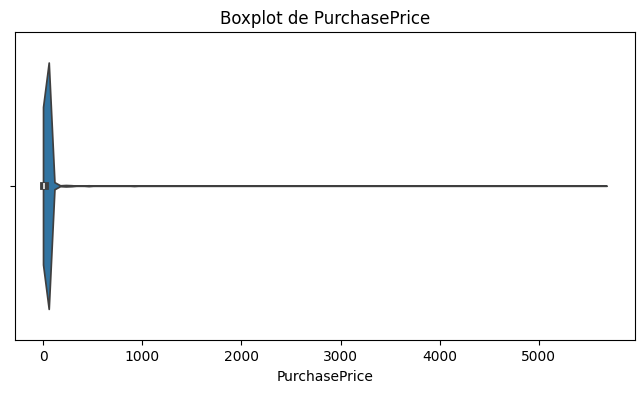

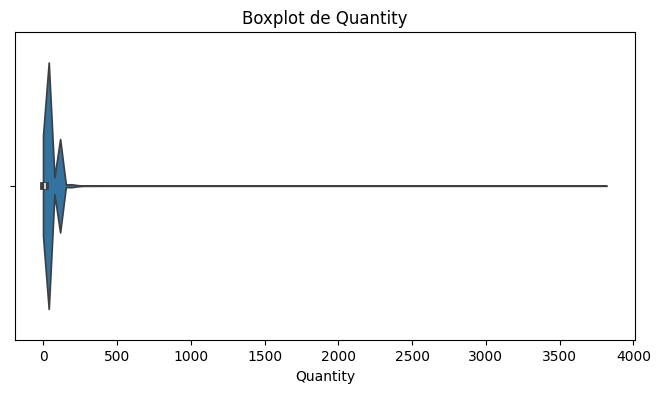

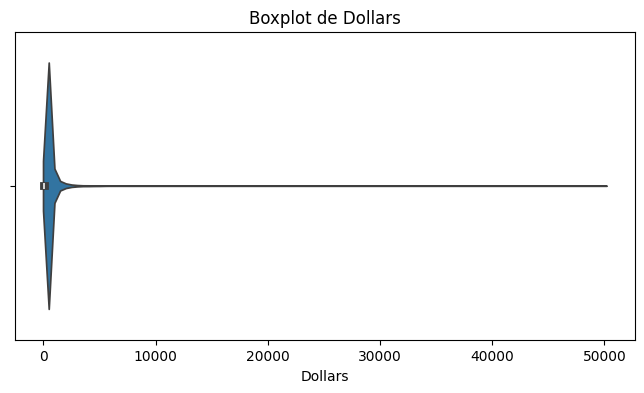

In [19]:
# lista de columnas numerica a analizar
numeric_cols = ['PurchasePrice','Quantity','Dollars']

for col in numeric_cols:
    plt.figure(figsize = (8 , 4) )
    sns.violinplot(x = df [col] )
    plt.title(f"ViolinPlot de {col}" )
    plt.show()

In [22]:
# Revisar valores negativos
for col in ["PurchasePrice", "Quantity", "Dollars"]:
    neg_values = df [df [col] < 0 ]
    print (f"Valores negativos en {col}: {len (neg_values) } filas")


Valores negativos en PurchasePrice: 0 filas
Valores negativos en Quantity: 0 filas
Valores negativos en Dollars: 0 filas


## EDA Paso 7: Relaciones iniciales

* Correlación entre variables numéricas (df.corr()).

* Tablas de frecuencia para variables categóricas (value_counts()).

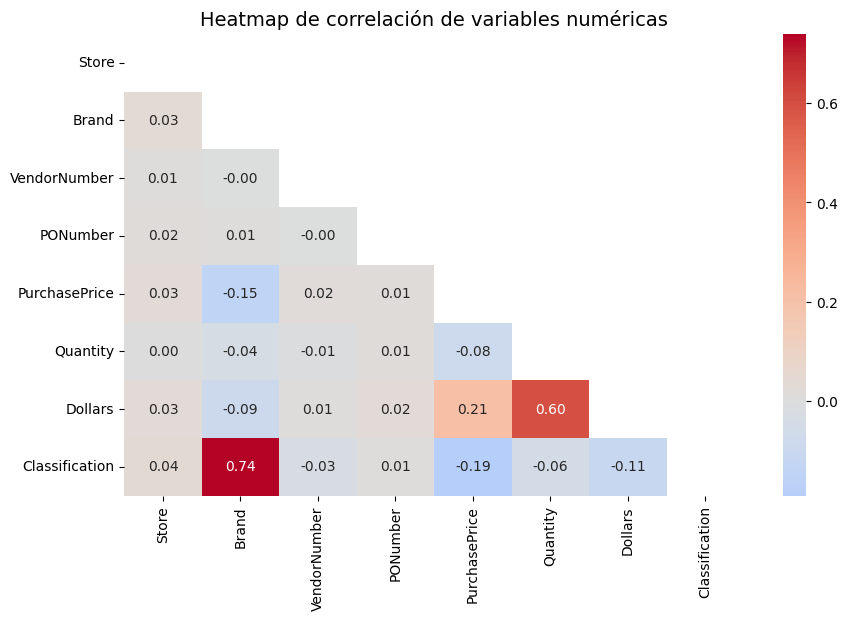

In [27]:
# Calculamos la matriz de correlación (solo numéricas)
corr_matrix = df.corr(numeric_only=True)

# Crear una máscara para el triángulo superior
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Ajustar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Heatmap
sns.heatmap(
    corr_matrix,        # matriz
    mask=mask,           
    annot=True,         # muestra los valores en cada celda
    fmt=".2f",          # formato de los números
    cmap="coolwarm",    # paleta de colores
    center=0            # centra el gradiente en 0
)

plt.title("Heatmap de correlación de variables numéricas", fontsize=14)
plt.show()

In [30]:
print(" Store:")
print(df['Store'].value_counts())

print("\n Brand:")
print(df['Brand'].value_counts())

print("\n VendorName:")
print(df['VendorName'].value_counts())

print("\n Classification:")
print(df['Classification'].value_counts())



 Store:
Store
76    121123
73     96794
38     93412
34     92113
66     82699
       ...  
36      6666
46      5777
29      5379
26      3974
3       1806
Name: count, Length: 80, dtype: int64

 Brand:
Brand
8068     7359
3893     7166
4261     6774
1233     6584
3405     6506
         ... 
26617       1
26508       1
13942       1
29554       1
38701       1
Name: count, Length: 10664, dtype: int64

 VendorName:
VendorName
DIAGEO NORTH AMERICA INC       243326
JIM BEAM BRANDS COMPANY        189832
CONSTELLATION BRANDS INC       185574
MARTIGNETTI COMPANIES          176487
E & J GALLO WINERY             162567
                                ...  
CAPSTONE INTERNATIONAL              1
TRUETT HURST                        1
FLAVOR ESSENCE INC                  1
LAUREATE IMPORTS CO                 1
AAPER ALCOHOL & CHEMICAL CO         1
Name: count, Length: 129, dtype: int64

 Classification:
Classification
1    1320234
2    1052240
Name: count, dtype: int64


Podemos observar diferentes cosas:
* Store: Tiene 80 tiendas, algunas mucho mas activas que otras.
* Brand: 10.664 marcas, algunas con solo un registro.
* VendorName: 129 proveedores, los mas grandes concentran gran parte de las compras.
* Classification: Solo hay dos categorias.

## Manejo de nulos
Vamos a dejarlos como Unknown, ya que son solo 3

In [31]:
df["Size"] = df["Size"].fillna("Unknown")

## Normalizamos el texto dentro de las columnas que lo contienen
Vamos a pasarlo todo a minusculas y quitarles los espacios.

In [ ]:
df["Description"] = df["Description"].str.strip().str.lower()

df["VendorName"] = df["VendorName"].str.strip().str.lower()

df["Size"] = df["Size"].str.strip().str.lower()

In [35]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")


## Validacion de regla de negocio
Vamos a corroborar que el precio por unidad multiplicado por la cantidad sea igual al monto que figura en la columna Dollars

In [ ]:
#Creamos una columna auxiliar para verificarlo

df["CalcDollars"] = df["purchaseprice"] * df["quantity"]

In [ ]:
#Ahora calculamos la diferencia entre la columna calculada y la columna original (Dollars)

diff = (df["dollars"] - df["CalcDollars"]).abs().sum()
print("Diferencia total en Dollars:", diff)

Diferencia total en Dollars: 1.3156049138984827e-08


Podemos observar que la diferencia entre el calculo que hicimos y la tabla ya existente es practicamente nula.

In [ ]:
# Eliminamos la columna auxiliar
df.drop(columns=["CalcDollars"], inplace=True)

## Exportamos a BigQuery
